In [13]:
from spuco.datasets import SpuCoMNIST, SpuriousFeatureDifficulty

import torch
import torchvision.transforms as transform

import matplotlib.pyplot as plt

In [4]:
difficulty = SpuriousFeatureDifficulty.MAGNITUDE_LARGE

classes = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]

device = device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
trainset = SpuCoMNIST(
    root='data',
    spurious_correlation_strength=0.99,
    classes=classes,
    spurious_feature_difficulty=difficulty,
    split='train'
)
trainset.initialize()

In [7]:
valset = SpuCoMNIST(
    root='data',
    classes=classes,
    spurious_feature_difficulty=difficulty,
    split='val'
)
valset.initialize()

In [8]:
testset = SpuCoMNIST(
    root='data',
    classes=classes,
    spurious_feature_difficulty=difficulty,
    split='test'
)
testset.initialize()

In [10]:
print(len(trainset))
print(len(valset))
print(len(testset))

48004
11996
10000


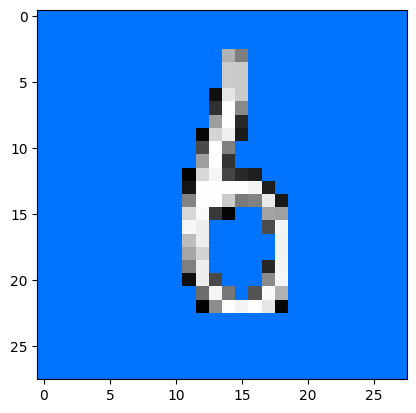

3


In [14]:
plt.imshow(transform.ToPILImage()(trainset[500][0]).resize((28, 28)))
plt.show()
print(trainset[500][1])

In [ ]:
from spuco.models import model_factory
from spuco.robust_train import ERM
from torch.optim import SGD

model = model_factory('lenet', trainset[0][0].shape, trainset.num_classes).to(device)
trainer = ERM(
    trainset=trainset,
    model=model,
    num_epochs=1,
    batch_size=64,
    optimizer=SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True),
    device=device,
    verbose=True,
)

trainer.train()